# ALAGAPPAN SATHAPPAN MIDTERM

GitHub Link: https://github.com/AlagappanS/Programming-for-Data-Science/blob/master/Sathappan_Alagappan_Midterm.ipynb

In [1]:
#Python Data Analysis imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from math import pi
from sklearn.preprocessing import MinMaxScaler

#Visualisation imports
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mpl_finance
from mpl_finance import candlestick_ohlc
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from bokeh.plotting import figure, show, output_file
from bokeh.models.annotations import Title

# Q1. Load in all stock tickers as variables with the ticker symbol as their variable name, including the all stock csv file. 

REPORT:

I have uploaded the "all_stocks_2006-01-01_to_2018-01-01.csv' file using pandas.read_csv method. Then I handled the few missing values using fillna. And then, using loop, loaded in all stock tickers as variables with the ticker symbol as their variable name.

In [2]:
#import csv
master = pd.read_csv('all_stocks_2006-01-01_to_2018-01-01.csv',  parse_dates=['Date'])

#Check for missing Values
len(master['Open'][master['Open'].isna()])
len(master['High'][master['High'].isna()])
len(master['Low'][master['Low'].isna()])
len(master['Close'][master['Close'].isna()])
len(master['Volume'][master['Volume'].isna()])
#Imputing missing values
master['Open'].fillna( value=master['Close'], inplace = True)
master['High'].fillna( value=master['Close'], inplace = True)
master['Low'].fillna( value=master['Close'], inplace = True)
stocks = master['Name'].unique()
#Create individual dataframes for each stock
#Creating stock tickers as variables with the ticker symbol as their variable name
stock_list = []
for stock in stocks:
    globals()[stock] = master[master['Name'] == stock].reset_index(drop = True)
    print(globals()[stock].head(2))
    stock_list.append(globals()[stock])
#example
GS.head()

        Date   Open   High    Low  Close   Volume Name
0 2006-01-03  77.76  79.35  77.24  79.11  3117200  MMM
1 2006-01-04  79.49  79.49  78.25  78.71  2558000  MMM
        Date   Open   High    Low  Close   Volume Name
0 2006-01-03  51.70  52.58  51.05  52.58  7825700  AXP
1 2006-01-04  52.44  52.57  51.81  51.95  5729400  AXP
        Date   Open   High    Low  Close     Volume  Name
0 2006-01-03  10.34  10.68  10.32  10.68  201853036  AAPL
1 2006-01-04  10.73  10.85  10.64  10.71  155225609  AAPL
        Date   Open   High    Low  Close   Volume Name
0 2006-01-03  70.40  70.60  69.33  70.44  4943100   BA
1 2006-01-04  70.08  71.27  69.86  71.17  3165000   BA
        Date   Open   High    Low  Close   Volume Name
0 2006-01-03  57.87  58.11  57.05  57.80  3697500  CAT
1 2006-01-04  57.95  59.43  57.55  59.27  4577200  CAT
        Date   Open   High    Low  Close    Volume Name
0 2006-01-03  57.25  59.10  57.06  59.08  13296500  CVX
1 2006-01-04  59.08  59.08  58.43  58.91   8838800  CV

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,126.70,129.44,124.23,128.87,6188700,GS
1,2006-01-04,127.35,128.91,126.38,127.09,4862000,GS
2,2006-01-05,126.00,127.32,125.61,127.04,3717600,GS
3,2006-01-06,127.29,129.25,127.29,128.84,4319600,GS
4,2006-01-09,128.50,130.62,128.00,130.39,4723500,GS


# 2. Perform Exploratory data analysis and data visualization for different time periods using given stock dataset.

REPORT

In Exploratory Data Analysis, we are analyzing the returns from each of the stocks using the Compounded Annual Growth Rate metric and the simple Year on Year Annual Return Rate.

1. CAGR:
Compound annual growth rate (CAGR) is essentially the geometric progression ratio that provides a constant rate of return over a specific time period. Formula: CAGR = (End Value/Start Value)^(1/Years)-1
After calculating the CAGR for each stock (using 1-1-2006 Open as base value) in loop, we are visualizing the percentages using a bar plot.

2. Annual Return Rate:
Annual Return is simply the pergentage increase or decrease in value of the stock in one year. A similar visualization approach to that of CAGR has been used.

3. Daily Return Rate:
Daily Return Rate is calculated as the pergentage increase or decrease in value of the stock from open to close in the same tradung day. It gives an indication of how volatile the stock is. We have plotted a scatter diagram of the daily return and comparing with mean and +- 1 SD. 

4. Distrubution of Daily Return Rate:
We are using a histogram to understand the distribution pattern of daily return rates. We can see how widely or tightly the daily fluctuations are distributred.

5. OHLC Candlestick Charts:
We are using Bokeh library to visualzie the daily Open-High-Low-Close stats of each stock.

In [3]:
s1, s2, s3, s4, s5, s6, s7 = AMZN, GOOGL, MSFT, AAPL, IBM, CSCO, GS
s1y = pd.concat([s1[['Date','Name','Open']].groupby([s1['Date'].dt.year]).first()[['Name', 'Open']], s1[['Date','High']].groupby(s1['Date'].dt.year).max()['High'], s1[['Date','Low']].groupby(s1['Date'].dt.year).min()['Low'], s1[['Date','Close']].groupby(s1['Date'].dt.year).last()['Close'], s1['Volume'].groupby(s1['Date'].dt.year).mean()], axis=1).reset_index()
s2y = pd.concat([s2[['Date','Name','Open']].groupby([s2['Date'].dt.year]).first()[['Name', 'Open']], s2[['Date','High']].groupby(s2['Date'].dt.year).max()['High'], s2[['Date','Low']].groupby(s2['Date'].dt.year).min()['Low'], s2[['Date','Close']].groupby(s2['Date'].dt.year).last()['Close'], s2['Volume'].groupby(s2['Date'].dt.year).mean()], axis=1).reset_index()
s3y = pd.concat([s3[['Date','Name','Open']].groupby([s3['Date'].dt.year]).first()[['Name', 'Open']], s3[['Date','High']].groupby(s3['Date'].dt.year).max()['High'], s3[['Date','Low']].groupby(s3['Date'].dt.year).min()['Low'], s3[['Date','Close']].groupby(s3['Date'].dt.year).last()['Close'], s3['Volume'].groupby(s3['Date'].dt.year).mean()], axis=1).reset_index()
s4y = pd.concat([s4[['Date','Name','Open']].groupby([s4['Date'].dt.year]).first()[['Name', 'Open']], s4[['Date','High']].groupby(s4['Date'].dt.year).max()['High'], s4[['Date','Low']].groupby(s4['Date'].dt.year).min()['Low'], s4[['Date','Close']].groupby(s4['Date'].dt.year).last()['Close'], s4['Volume'].groupby(s4['Date'].dt.year).mean()], axis=1).reset_index()
s5y = pd.concat([s5[['Date','Name','Open']].groupby([s5['Date'].dt.year]).first()[['Name', 'Open']], s5[['Date','High']].groupby(s5['Date'].dt.year).max()['High'], s5[['Date','Low']].groupby(s5['Date'].dt.year).min()['Low'], s5[['Date','Close']].groupby(s5['Date'].dt.year).last()['Close'], s5['Volume'].groupby(s5['Date'].dt.year).mean()], axis=1).reset_index()
s6y = pd.concat([s6[['Date','Name','Open']].groupby([s6['Date'].dt.year]).first()[['Name', 'Open']], s6[['Date','High']].groupby(s6['Date'].dt.year).max()['High'], s6[['Date','Low']].groupby(s6['Date'].dt.year).min()['Low'], s6[['Date','Close']].groupby(s6['Date'].dt.year).last()['Close'], s6['Volume'].groupby(s6['Date'].dt.year).mean()], axis=1).reset_index()
s7y = pd.concat([s7[['Date','Name','Open']].groupby([s7['Date'].dt.year]).first()[['Name', 'Open']], s7[['Date','High']].groupby(s7['Date'].dt.year).max()['High'], s7[['Date','Low']].groupby(s7['Date'].dt.year).min()['Low'], s7[['Date','Close']].groupby(s7['Date'].dt.year).last()['Close'], s7['Volume'].groupby(s7['Date'].dt.year).mean()], axis=1).reset_index()
s1y.columns = s2y.columns=s3y.columns = s4y.columns=s5y.columns = s6y.columns=s7y.columns = ['Year', 'Name', 'Open', 'High', 'Low', 'Close', 'Avg. Daily Volume']
companies = [s1y, s2y, s3y, s4y, s5y, s6y, s7y]

#Calculating Compund Annual Growth rate from 2006 and annual return % for the above 7 stocks:
for company in companies:
    company['CAGR'] =  company['Close'].div(company['Open'][0]).pow(1./(company['Year']+1-company['Year'][0])).sub(1)
    company['Annual Return Rate'] =  ((company['Close']/company['Open'])-1)

#CALCULATING MOVING AVERAGES:

#SIMPLE MOVING AVERAGE
ma_day = [10, 20, 120, 250]
for ma in ma_day:
    column_name = "%s-day MA" %(str(ma))  
    for stock in stock_list:
        stock[column_name] = stock['Close'].rolling(window=ma,center=False).mean()

#VOLUME-WIGHTED MOVING AVERAGE
vwma_day = ma_day
for vwma in vwma_day:
    column_name = "%s-day VWMA" %(str(vwma))  
    for stock in stock_list:
        stock[column_name] = ((stock['High']+stock['Low'])*stock['Volume']//2).rolling(window=vwma,center=False).sum() / (stock['Volume']).rolling(window = vwma,center=False).sum()

In [4]:
# SAMPLE (Showing CAGR and Annual Return)
IBM_yearly_summary = s5y
IBM_yearly_summary[['Year','Name','Open','Close', 'CAGR', 'Annual Return Rate']]

,Year,Name,Open,Close,CAGR,Annual Return Rate
0,2006,IBM,82.45,97.15,0.178290,0.178290
1,2007,IBM,97.18,108.10,0.145032,0.112369
2,2008,IBM,108.99,84.16,0.006866,-0.227819
3,2009,IBM,83.89,130.90,0.122502,0.560377
4,2010,IBM,131.18,146.76,0.122234,0.118768
5,2011,IBM,147.21,183.88,0.143029,0.249100
6,2012,IBM,186.73,191.55,0.127973,0.025813
7,2013,IBM,194.09,187.57,0.108209,-0.033593
8,2014,IBM,187.21,160.44,0.076774,-0.142994
9,2015,IBM,161.31,137.62,0.052565,-0.146860


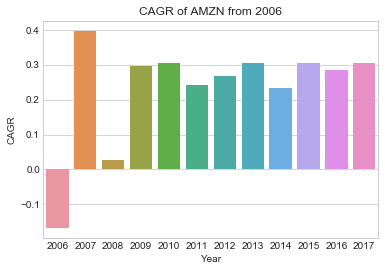

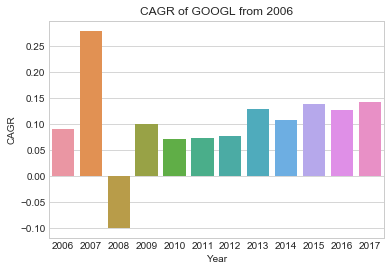

<Figure size 432x288 with 0 Axes>

In [5]:
#Visualizing CAGR:
how_many = 2 #upto 7
for i in companies[0:how_many]:
    sns.barplot(x = i['Year'], y = i['CAGR']).set_title('CAGR of {} from 2006'.format(i['Name'].iloc[1]))
    plt.figure()

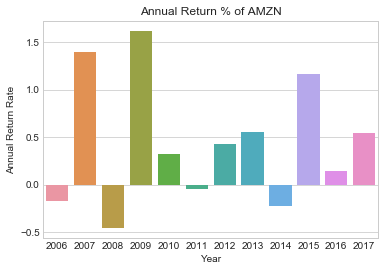

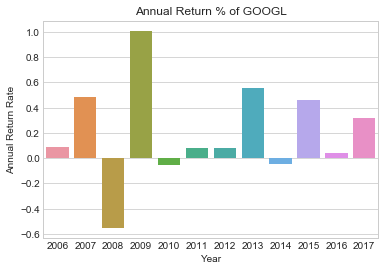

<Figure size 432x288 with 0 Axes>

In [6]:
#Visualizing Annual Return:
how_many = 2 #upto 7
for i in companies[0:how_many]:
    sns.barplot(x = i['Year'], y = i['Annual Return Rate']).set_title('Annual Return % of {}'.format(i['Name'].iloc[1]))
    plt.figure()

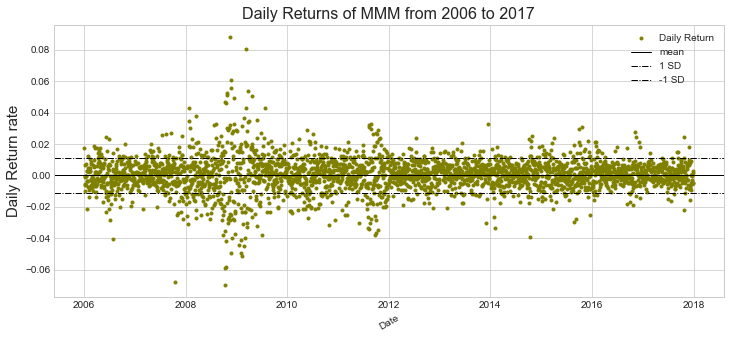

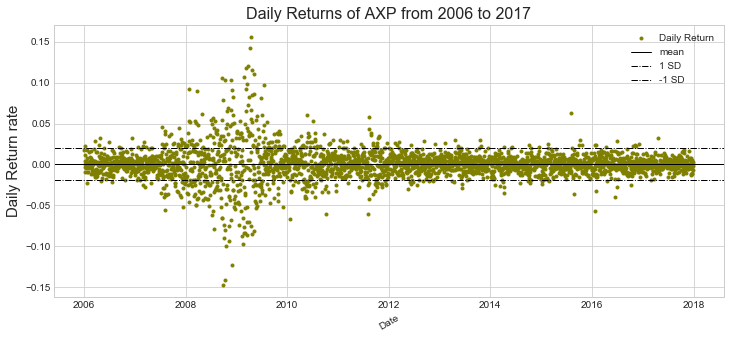

In [7]:
how_many = 2  # can be changed up to a maximum of 31 to generate this chart for as many stocks.

for i in stock_list[0:how_many]:
    plt.figure(figsize=(12,5))
    plt.plot(i['Date'],((i['Close']/i['Open'])-1),color='olive', linestyle='',marker='.', label = 'Daily Return')
    plt.xlabel('Date',fontsize=10, rotation = 30)
    plt.axhline(y=((i['Close']/i['Open'])-1).mean(), linewidth=1, color = 'k', label = 'mean')
    plt.axhline(y=((i['Close']/i['Open'])-1).std(), linewidth=1, linestyle='-.', color = 'k', label = '1 SD')
    plt.axhline(y=-((i['Close']/i['Open'])-1).std(), linewidth=1, linestyle='-.', color = 'k', label = '-1 SD')
    plt.ylabel('Daily Return rate',fontsize=15)
    plt.xticks(fontsize=10)
    plt.grid(True)
    plt.legend()
    plt.yticks(fontsize=10)
    plt.title('Daily Returns of {} from 2006 to 2017'.format(i['Name'].iloc[1]),fontsize=16)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


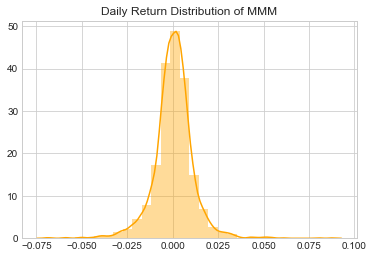

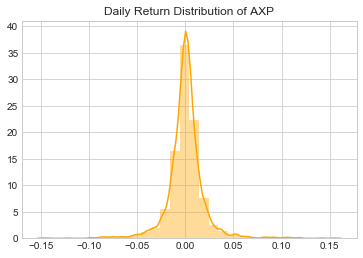

<Figure size 432x288 with 0 Axes>

In [8]:
how_many = 2  # can be changed up to a maximum of 31 to this chart for as many stocks.

for i in stock_list[0:how_many]:
    sns.distplot(((i['Close']/i['Open'])-1),bins=30,color='orange').set_title('Daily Return Distribution of {}'.format(i['Name'].iloc[1]))
    plt.figure()

In [9]:
# 5. Daily O-H-L-C Statistic Vizualization:
# 120 Day OHLC Candlestick Chart (NOTE: OPENS IN NEW TAB IN BROWSER)

how_many = 1 # can be changed up to a maximum of 31 to generate candlestick charts for as many stocks.

for i in stock_list[0:how_many]:
    how_long = 120 # can be changed upto 3020 days
    df = i.tail(how_long)
    df_name = df['Name'].iloc[1]

    mids = (df.Open + df.Close)/2
    spans = abs(df.Close-df.Open)
    inc = df.Close > df.Open
    dec = df.Open > df.Close
    w = 15*60*60*1000 # width of OHLC candlestick in milliseconds (x-axis)

    output_file("candlestick{}.html".format(df_name), title="Candlestick {}".format(df_name))

    TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

    p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=1000, toolbar_location="right")

    p.segment(df.Date, df.High, df.Date, df.Low, color="black")
    p.rect(df.Date[inc], mids[inc], w, spans[inc], fill_color="rgb(250,50,50)", line_color="black")
    p.rect(df.Date[dec], mids[dec], w, spans[dec], fill_color="rgb(50,250,50)", line_color="black")
    p.line(df.Date[inc], df['10-day MA'], legend = '10 day moving average')

    t = Title()
    t.text = '{} day OHLC Candlestick chart for {}'.format(how_long, df_name)
    p.title = t
    p.xaxis.major_label_orientation = pi/4 
    p.grid.grid_line_alpha=0.3
    
    show(p) # open a browser

C:\ProgramData\Anaconda3\lib\site-packages\bokeh\models\sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 57), ('y', 120)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


# 3. You need to take one stock and perform descriptive analysis  (Min, Max, explore some moving averages over the time) and Compare two stock’s descriptive analysis.

REPORT

I have taken Amazon stock to perform descriptive analysis. The analysis is compared with Google.

1. Year-wise Summary:
As the first step, we are grouping the data for each stock by year to create a table that summarizes the yearly stats for the stock. For each individual stock, the respectve table includes the open price for each year, highest traded price (MAX), lowest traded price (MIN), and last traded price of the year (last close), the yearly return rate and the CAGR calculated till the end of each year using the open price as of 1-1-2006 as the base value.

2. Daily O-H-L-C Statistic Vizualization:
The Open-High-Low-Close price can be visualized using a Candlestick plot. The plot indicates if the stock price increased or decreased from Open to Close on the particular trading day using a color scheme (Green = Increase, Red = Decrease). It also indicates what were the highest traded and lowest trade prices of the stock on each day.
PLEASE NOTE: The Candlestick plot using Bokeh package opens outside jupyter notebook in a New Tab or New Browser Window based on your settings.

3. Simple-Moving Average (SMA):
I have calculated the simple moving average of the close price of each stock for 10-day, 20-day, 120-day and 250-day period.
Given a week has 5 trading days (a year has ~252 trading days), this essentially provides the moving average for a week, month, six months and one year. I have plotted the 120 and 250 day SMA along with the daily close price of the stock.

4. Volume Weighted Moving Average(VWMA):
Similar to I have also calculated a moving avergae using volume (no. of stocks traded daily) as weights to provide a more smoother and accurate trend. The VWMA ensures that the weighted average price trend is more in-line with volume traded on the market. It is a measure of the average price at which a stock is traded over the trading horizon. A similar visualization to that of SMA has been added for VWMA as well.

In [10]:
# 1. Year-wise summary
AMZN_yearly_summary = s1y
AMZN_yearly_summary

,Year,Name,Open,High,Low,Close,Avg. Daily Volume,CAGR,Annual Return Rate
0,2006,AMZN,47.47,48.58,25.76,39.46,7.141643e+06,-0.168738,-0.168738
1,2007,AMZN,38.68,101.09,36.30,92.64,9.779473e+06,0.396978,1.395036
2,2008,AMZN,95.35,97.43,34.68,51.28,9.962182e+06,0.026068,-0.462192
3,2009,AMZN,51.35,145.91,47.63,134.52,8.518105e+06,0.297454,1.619669
4,2010,AMZN,136.25,185.65,105.80,180.00,7.288140e+06,0.305481,0.321101
5,2011,AMZN,181.37,246.71,160.59,173.10,5.810698e+06,0.240642,-0.045597
6,2012,AMZN,175.89,264.11,172.00,250.87,4.200934e+06,0.268498,0.426289
7,2013,AMZN,256.08,405.63,245.75,398.79,2.969756e+06,0.304790,0.557287
8,2014,AMZN,398.80,408.06,284.00,310.35,4.088199e+06,0.231980,-0.221790
9,2015,AMZN,312.58,696.44,285.25,675.89,3.786690e+06,0.304204,1.162294


In [11]:
#Year-wise summary for comparison with AMAZON in previous cell
GOOGL_yearly_summary = s2y
GOOGL_yearly_summary

,Year,Name,Open,High,Low,Close,Avg. Daily Volume,CAGR,Annual Return Rate
0,2006,GOOGL,211.47,256.76,165.94,230.47,8.502528e+06,0.089847,0.089847
1,2007,GOOGL,233.23,373.99,218.72,346.09,5.447597e+06,0.279293,0.483900
2,2008,GOOGL,346.78,349.03,123.77,153.98,6.348455e+06,-0.100354,-0.555972
3,2009,GOOGL,154.45,313.31,141.52,310.30,3.512794e+06,0.100609,1.009064
4,2010,GOOGL,313.79,315.74,217.03,297.28,3.186180e+06,0.070492,-0.052615
5,2011,GOOGL,298.54,323.70,236.75,323.27,3.086213e+06,0.073296,0.082836
6,2012,GOOGL,326.80,387.58,278.54,354.04,2.599995e+06,0.076396,0.083354
7,2013,GOOGL,360.07,561.06,348.11,560.92,2.088638e+06,0.129683,0.557808
8,2014,GOOGL,558.29,615.05,497.19,530.66,2.102613e+06,0.107634,-0.049490
9,2015,GOOGL,532.60,798.69,490.91,778.01,2.166042e+06,0.139131,0.460777


In [12]:
# 2. Daily O-H-L-C Statistic Vizualization:
# 120 Day OHLC Candlestick Chart (NOTE: OPENS IN NEW TAB IN BROWSER)

how_many = 2 # can be changed up to a maximum of 31 to generate candlestick charts for as many stocks.

for i in [AMZN, GOOGL]:
    how_long = 120 # can be changed upto 3020 days
    df = i.tail(how_long)
    df_name = df['Name'].iloc[1]

    mids = (df.Open + df.Close)/2
    spans = abs(df.Close-df.Open)
    inc = df.Close > df.Open
    dec = df.Open > df.Close
    w = 15*60*60*1000 # width of OHLC candlestick in milliseconds (x-axis)

    output_file("candlestick{}.html".format(df_name), title="Candlestick {}".format(df_name))

    TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

    p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=1000, toolbar_location="right")

    p.segment(df.Date, df.High, df.Date, df.Low, color="black")
    p.rect(df.Date[inc], mids[inc], w, spans[inc], fill_color="rgb(250,50,50)", line_color="black")
    p.rect(df.Date[dec], mids[dec], w, spans[dec], fill_color="rgb(50,250,50)", line_color="black")
    p.line(df.Date[inc], df['10-day MA'], legend = '10 day moving average')

    t = Title()
    t.text = '{} day OHLC Candlestick chart for {}'.format(how_long, df_name)
    p.title = t
    p.xaxis.major_label_orientation = pi/4 
    p.grid.grid_line_alpha=0.3
    
    show(p) # open a browser

C:\ProgramData\Anaconda3\lib\site-packages\bokeh\models\sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 53), ('y', 120)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
C:\ProgramData\Anaconda3\lib\site-packages\bokeh\models\sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 58), ('y', 120)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


In [13]:
#Displaying example of company-wise Moving Averages: (Moving Averages calculated for all stocks in earlier cells)
AMZN.tail(10)

,Date,Open,High,Low,Close,Volume,Name,10-day MA,20-day MA,120-day MA,250-day MA,10-day VWMA,20-day VWMA,120-day VWMA,250-day VWMA
3009,2017-12-15,1179.03,1182.75,1169.33,1179.14,4778621,AMZN,1160.119,1161.4415,1029.518167,954.09572,1159.812406,1165.464170,1036.323143,960.002365
3010,2017-12-18,1187.37,1194.78,1180.91,1190.58,2947625,AMZN,1165.782,1164.4765,1031.186917,955.77316,1164.097518,1167.348303,1037.871774,961.337468
3011,2017-12-19,1189.15,1192.97,1179.14,1187.38,2587792,AMZN,1170.363,1167.5300,1032.949000,957.44028,1169.137182,1169.062892,1039.404476,962.438661
3012,2017-12-20,1190.50,1191.00,1176.00,1177.62,2371166,AMZN,1172.890,1169.4365,1034.695833,959.08540,1172.628344,1170.617071,1040.728048,963.590974
3013,2017-12-21,1175.90,1179.17,1167.64,1174.76,2123117,AMZN,1174.387,1170.3665,1036.538333,960.74208,1174.065729,1171.624797,1041.936150,964.543889
3014,2017-12-22,1172.08,1174.62,1167.83,1168.36,1585054,AMZN,1175.023,1169.4845,1038.179667,962.32992,1174.934963,1171.514596,1043.095231,965.500168
3015,2017-12-26,1168.36,1178.32,1160.55,1176.76,2005187,AMZN,1175.807,1168.5310,1039.943167,963.94844,1175.543904,1168.477482,1044.298030,966.673417
3016,2017-12-27,1179.91,1187.29,1175.61,1182.26,1867208,AMZN,1177.525,1167.9640,1041.639000,965.61688,1176.646658,1166.902697,1045.354197,967.841944
3017,2017-12-28,1189.00,1190.10,1184.38,1186.10,1841676,AMZN,1179.722,1169.2055,1043.219250,967.36180,1178.561787,1167.050860,1046.443923,969.288545
3018,2017-12-29,1182.35,1184.00,1167.50,1169.47,2688391,AMZN,1179.243,1168.8415,1044.680417,969.02500,1179.342182,1167.281339,1047.688739,970.784790


In [14]:
#Displaying of company-wise Moving Averages of GOOGL for comparison with AMZN in above cell: (Moving Averages calculated for all stocks in earlier cells)
GOOGL.tail(10)

,Date,Open,High,Low,Close,Volume,Name,10-day MA,20-day MA,120-day MA,250-day MA,10-day VWMA,20-day VWMA,120-day VWMA,250-day VWMA
3009,2017-12-15,1063.78,1075.25,1060.09,1072.00,3187985,GOOGL,1043.974,1045.1475,983.506833,930.89716,1045.417511,1045.890018,983.121351,933.387738
3010,2017-12-18,1076.45,1086.49,1070.37,1085.09,1514601,GOOGL,1051.296,1047.6075,984.540833,931.97672,1051.232971,1047.526911,984.325041,934.305738
3011,2017-12-19,1083.02,1084.98,1072.27,1079.78,1317519,GOOGL,1057.314,1049.8635,985.723833,933.04704,1057.226026,1049.062983,985.685814,935.221917
3012,2017-12-20,1080.92,1081.24,1068.60,1073.56,1436391,GOOGL,1061.398,1051.0265,986.922833,934.10256,1061.396015,1050.304762,986.920720,936.070985
3013,2017-12-21,1075.39,1077.52,1069.00,1070.85,1282025,GOOGL,1064.026,1051.9730,988.184417,935.15476,1064.188982,1051.140633,988.039929,936.746017
3014,2017-12-22,1070.00,1071.72,1067.64,1068.86,889446,GOOGL,1065.974,1052.5900,989.322750,936.19048,1065.824877,1051.503815,989.079922,937.340254
3015,2017-12-26,1068.64,1068.86,1058.64,1065.85,918767,GOOGL,1067.362,1052.2820,990.474083,937.23560,1066.907289,1051.184078,990.085041,938.014702
3016,2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,GOOGL,1068.505,1052.1275,991.469000,938.26488,1068.168040,1050.704297,990.977312,938.714589
3017,2017-12-28,1062.25,1064.84,1053.38,1055.95,994249,GOOGL,1068.961,1053.0560,992.343583,939.31888,1069.203831,1051.558666,991.666756,939.620627
3018,2017-12-29,1055.49,1058.05,1052.70,1053.40,1180340,GOOGL,1068.554,1053.9175,993.175833,940.30044,1069.015916,1052.797509,992.385135,940.615894


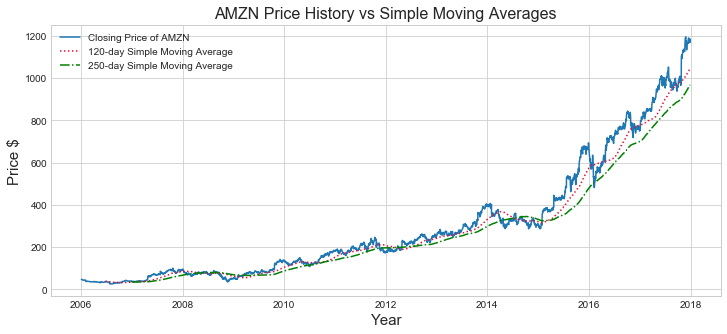

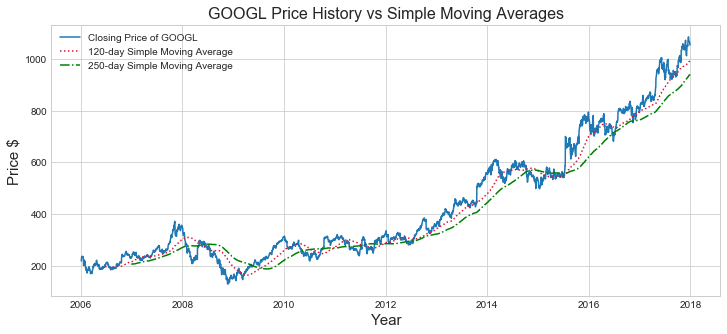

In [15]:
#3. Plotting Simple Moving Averages:
for i in [AMZN, GOOGL]:
        plt.figure(figsize=(12,5))
        plt.plot(i['Date'], i['Close'], label='Closing Price of {}'.format(i['Name'].iloc[1]))
        plt.plot(i['Date'], i['120-day MA'],':', color = 'crimson', label='120-day Simple Moving Average')
        plt.plot(i['Date'], i['250-day MA'],'-.', color = 'green', label='250-day Simple Moving Average')
        plt.grid(True)
        plt.title('{} Price History vs Simple Moving Averages'.format(i['Name'].iloc[1]) ,fontsize=16)
        plt.legend()
        plt.xlabel('Year',fontsize=15, rotation = 0)
        plt.ylabel('Price $',fontsize=15)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()

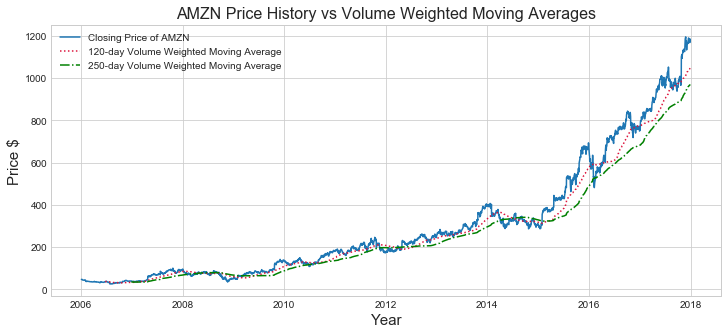

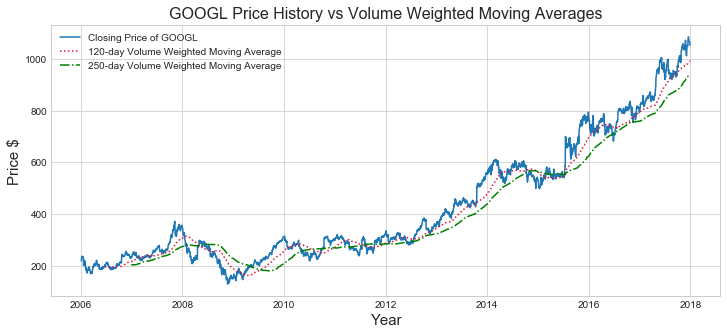

In [16]:
# 4.Plotting Volume Weighted Moving Averages:
for i in [AMZN, GOOGL]:
        plt.figure(figsize=(12,5))
        plt.plot(i['Date'], i['Close'], label='Closing Price of {}'.format(i['Name'].iloc[1]))
        plt.plot(i['Date'], i['120-day VWMA'],':', color = 'crimson', label='120-day Volume Weighted Moving Average')
        plt.plot(i['Date'], i['250-day VWMA'],'-.', color = 'green', label='250-day Volume Weighted Moving Average')
        plt.grid(True)
        plt.title('{} Price History vs Volume Weighted Moving Averages'.format(i['Name'].iloc[1]) ,fontsize=16)
        plt.legend()
        plt.xlabel('Year',fontsize=15, rotation = 0)
        plt.ylabel('Price $',fontsize=15)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020156280EB8>,
      dtype=object)

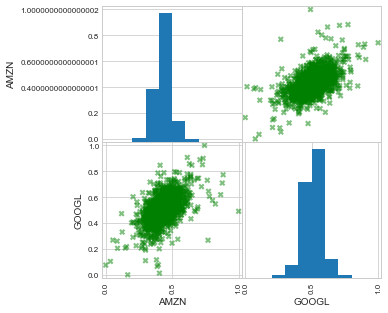

In [17]:
#Scatter Matrix indicating correlation between the daily returns of AMZN and GOOGL
#Using Scaled Values
headers = []
matrix = pd.DataFrame()

for i in [AMZN, GOOGL]:
    headers.append(i['Name'].iloc[1])
    matrix = matrix.assign(new_col = (i['Close']/i['Open']-1))
    matrix.columns = headers

#Scaling
headers
matrix
matrix -= matrix.min()
matrix /= matrix.max()
scatter_matrix(matrix, figsize = (5,5),c='g', alpha = 0.5, marker = 'X')

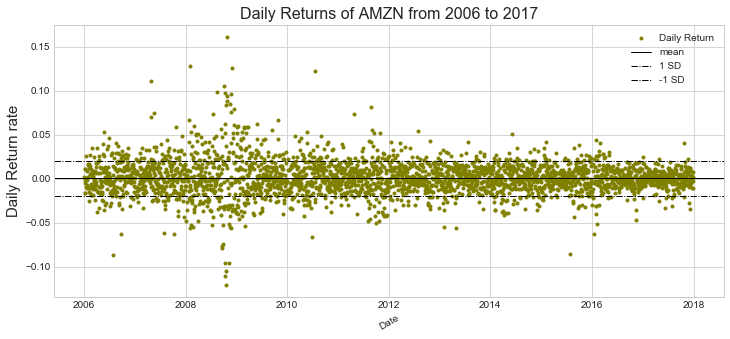

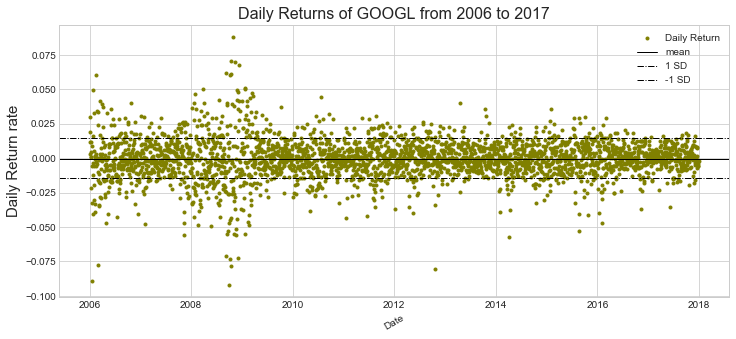

In [18]:
# Daily Return Scatter Plot
for i in [AMZN, GOOGL]:
    plt.figure(figsize=(12,5))
    plt.plot(i['Date'],((i['Close']/i['Open'])-1),color='olive', linestyle='',marker='.', label = 'Daily Return')
    plt.xlabel('Date',fontsize=10, rotation = 30)
    plt.axhline(y=((i['Close']/i['Open'])-1).mean(), linewidth=1, color = 'k', label = 'mean')
    plt.axhline(y=((i['Close']/i['Open'])-1).std(), linewidth=1, linestyle='-.', color = 'k', label = '1 SD')
    plt.axhline(y=-((i['Close']/i['Open'])-1).std(), linewidth=1, linestyle='-.', color = 'k', label = '-1 SD')
    plt.ylabel('Daily Return rate',fontsize=15)
    plt.xticks(fontsize=10)
    plt.grid(True)
    plt.legend()
    plt.yticks(fontsize=10)
    plt.title('Daily Returns of {} from 2006 to 2017'.format(i['Name'].iloc[1]),fontsize=16)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


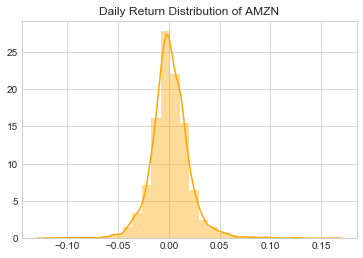

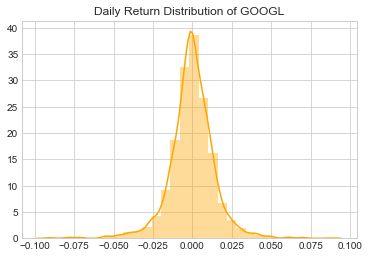

<Figure size 432x288 with 0 Axes>

In [19]:
# Daily Return Distribution
for i in [AMZN, GOOGL]:
    sns.distplot(((i['Close']/i['Open'])-1),bins=30,color='orange').set_title('Daily Return Distribution of {}'.format(i['Name'].iloc[1]))
    plt.figure()

# Q4. Take five stocks of your choice and create the same type of report stated in question 3.

REPORT
The same report carried out for AMZN in Q3 is done for 5 additional comapanies

In [20]:
# Year-wise Summary Stats for 5 companies
for i in companies[2:7]:
    print (i)

    Year  Name   Open   High    Low  Close  Avg. Daily Volume      CAGR  \
0   2006  MSFT  26.25  30.26  21.46  29.86       6.718922e+07  0.137524   
1   2007  MSFT  29.91  37.50  26.60  35.60       6.253800e+07  0.164556   
2   2008  MSFT  35.79  35.96  17.50  19.44       8.424315e+07 -0.095263   
3   2009  MSFT  19.53  31.50  14.87  30.48       6.244271e+07  0.038058   
4   2010  MSFT  30.62  31.58  22.73  27.91       6.303515e+07  0.012339   
5   2011  MSFT  28.05  29.46  23.65  25.96       6.077909e+07 -0.001850   
6   2012  MSFT  26.55  32.95  26.26  26.71       4.794077e+07  0.002485   
7   2013  MSFT  27.25  38.98  26.28  37.41       4.862585e+07  0.045279   
8   2014  MSFT  37.35  50.04  34.63  46.45       3.339201e+07  0.065466   
9   2015  MSFT  46.66  56.85  39.72  55.48       3.579466e+07  0.077707   
10  2016  MSFT  54.32  64.10  48.04  62.14       3.086962e+07  0.081489   
11  2017  MSFT  62.79  87.50  61.95  85.54       2.243715e+07  0.103452   

    Annual Return Rate  

In [21]:
#2. Daily O-H-L-C Statistic Vizualization for 5 companies
# 120 Day OHLC Candlestick Chart (NOTE: OPENS IN NEW TAB IN BROWSER)
for i in [s3, s4, s5, s6, s7]:
    how_long = 120 # can be changed upto 3020 days
    df = i.tail(how_long)
    df_name = df['Name'].iloc[1]

    mids = (df.Open + df.Close)/2
    spans = abs(df.Close-df.Open)
    inc = df.Close > df.Open
    dec = df.Open > df.Close
    w = 15*60*60*1000 # width of OHLC candlestick in milliseconds (x-axis)

    output_file("candlestick{}.html".format(df_name), title="Candlestick {}".format(df_name))

    TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

    p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=1000, toolbar_location="right")

    p.segment(df.Date, df.High, df.Date, df.Low, color="black")
    p.rect(df.Date[inc], mids[inc], w, spans[inc], fill_color="rgb(250,50,50)", line_color="black")
    p.rect(df.Date[dec], mids[dec], w, spans[dec], fill_color="rgb(50,250,50)", line_color="black")
    p.line(df.Date[inc], df['10-day MA'], legend = '10 day moving average')

    t = Title()
    t.text = '{} day OHLC Candlestick chart for {}'.format(how_long, df_name)
    p.title = t
    p.xaxis.major_label_orientation = pi/4 
    p.grid.grid_line_alpha=0.3
    
    show(p) # open a browser

C:\ProgramData\Anaconda3\lib\site-packages\bokeh\models\sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 68), ('y', 120)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
C:\ProgramData\Anaconda3\lib\site-packages\bokeh\models\sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 63), ('y', 120)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
C:\ProgramData\Anaconda3\lib\site-packages\bokeh\models\sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 50), ('y', 120)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
C:\ProgramData\Anaconda3\lib\site-packages\bokeh\models\sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of

In [22]:
# MA table (last 5 records for each)

for i in [s3, s4, s5, s6, s7]:
    print(i.tail(5))

           Date   Open   High    Low  Close    Volume  Name  10-day MA  \
3014 2017-12-22  85.40  85.63  84.92  85.51  14145841  MSFT     85.644   
3015 2017-12-26  85.31  85.53  85.03  85.40   9891237  MSFT     85.661   
3016 2017-12-27  85.65  85.98  85.22  85.71  14678025  MSFT     85.674   
3017 2017-12-28  85.90  85.93  85.55  85.72  10594344  MSFT     85.711   
3018 2017-12-29  85.63  86.05  85.50  85.54  18717406  MSFT     85.796   

      20-day MA  120-day MA  250-day MA  10-day VWMA  20-day VWMA  \
3014    84.4530   77.418167    71.65460    85.687452    84.429069   
3015    84.5295   77.558417    71.74424    85.763348    84.474313   
3016    84.5710   77.693833    71.83548    85.773947    84.504641   
3017    84.6900   77.825000    71.92980    85.792083    84.557782   
3018    84.7585   77.954583    72.02164    85.845135    84.651162   

      120-day VWMA  250-day VWMA  
3014     77.842217     71.614550  
3015     77.949916     71.660734  
3016     78.052508     71.712926  


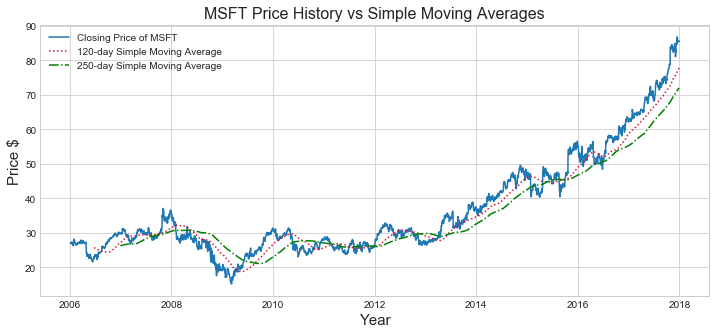

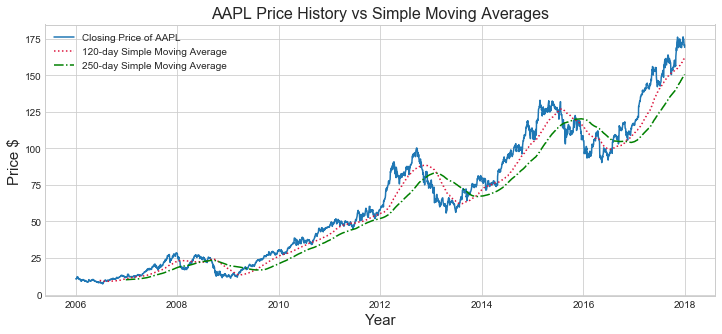

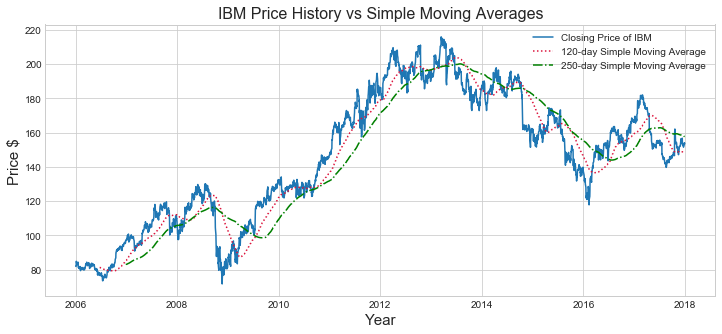

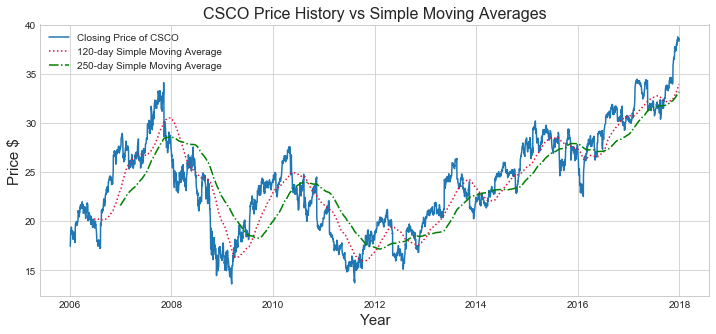

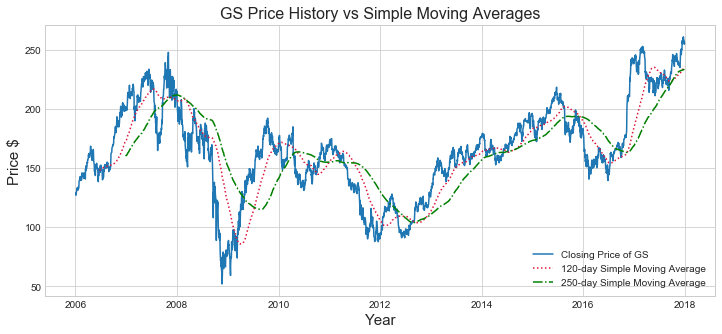

In [23]:
#SMA

for i in [s3, s4, s5, s6, s7]:
        plt.figure(figsize=(12,5))
        plt.plot(i['Date'], i['Close'], label='Closing Price of {}'.format(i['Name'].iloc[1]))
        plt.plot(i['Date'], i['120-day MA'],':', color = 'crimson', label='120-day Simple Moving Average')
        plt.plot(i['Date'], i['250-day MA'],'-.', color = 'green', label='250-day Simple Moving Average')
        plt.grid(True)
        plt.title('{} Price History vs Simple Moving Averages'.format(i['Name'].iloc[1]) ,fontsize=16)
        plt.legend()
        plt.xlabel('Year',fontsize=15, rotation = 0)
        plt.ylabel('Price $',fontsize=15)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()

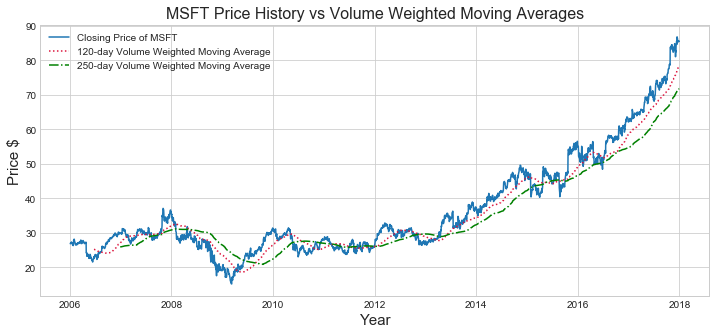

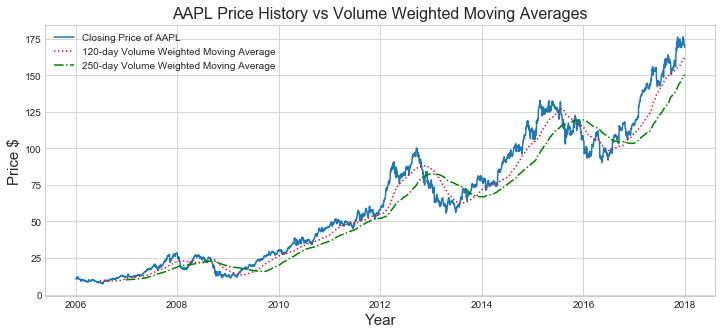

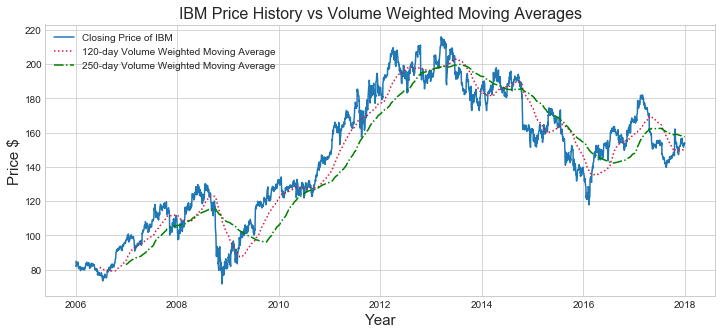

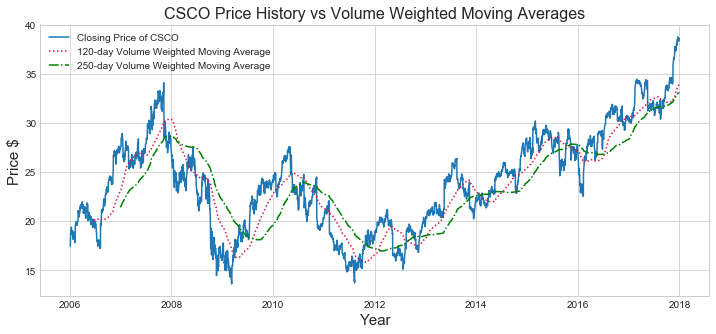

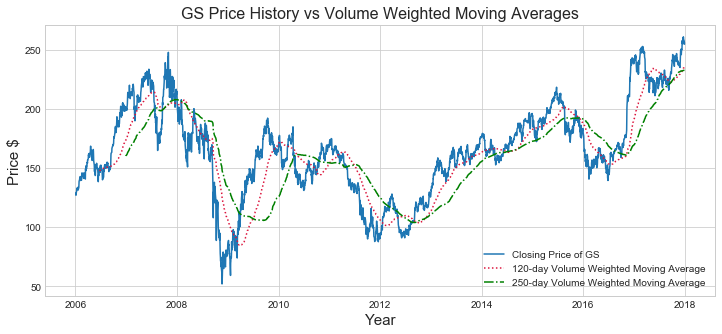

In [24]:
#VWMA

for i in [s3, s4, s5, s6, s7]:
        plt.figure(figsize=(12,5))
        plt.plot(i['Date'], i['Close'], label='Closing Price of {}'.format(i['Name'].iloc[1]))
        plt.plot(i['Date'], i['120-day VWMA'],':', color = 'crimson', label='120-day Volume Weighted Moving Average')
        plt.plot(i['Date'], i['250-day VWMA'],'-.', color = 'green', label='250-day Volume Weighted Moving Average')
        plt.grid(True)
        plt.title('{} Price History vs Volume Weighted Moving Averages'.format(i['Name'].iloc[1]) ,fontsize=16)
        plt.legend()
        plt.xlabel('Year',fontsize=15, rotation = 0)
        plt.ylabel('Price $',fontsize=15)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020154B033C8>,
      dtype=object)

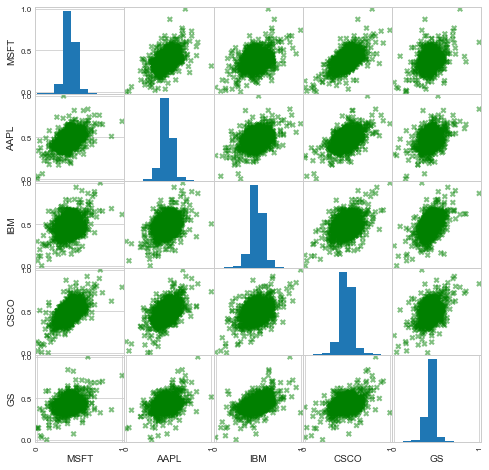

In [25]:
#Scatter Matrix indicating correlation between the daily returns of 5-additional companies as a dirty visualization.
#We can notice that the daily returns are more correlated with each other among tech compnies (MSFT, AAPL, IBM) when compared to GS (which is from the finance industry) 
headers = []
matrix = pd.DataFrame()

for i in [s3, s4, s5, s6, s7]:
    headers.append(i['Name'].iloc[1])
    matrix = matrix.assign(new_col = (i['Close']/i['Open']-1))
    matrix.columns = headers
#Scaling
headers
matrix
matrix -= matrix.min()
matrix /= matrix.max()
scatter_matrix(matrix, figsize = (8,8),c='g', alpha = 0.5, marker = 'X')

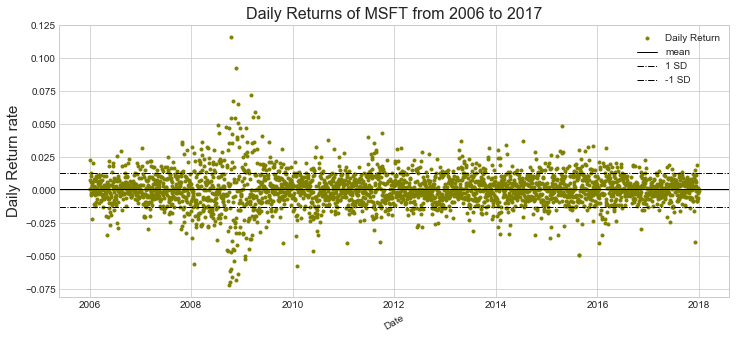

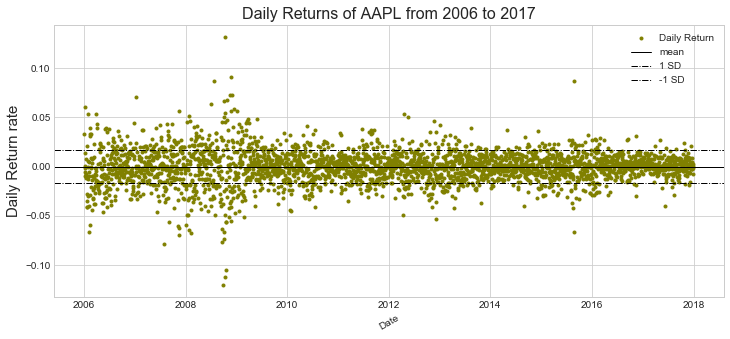

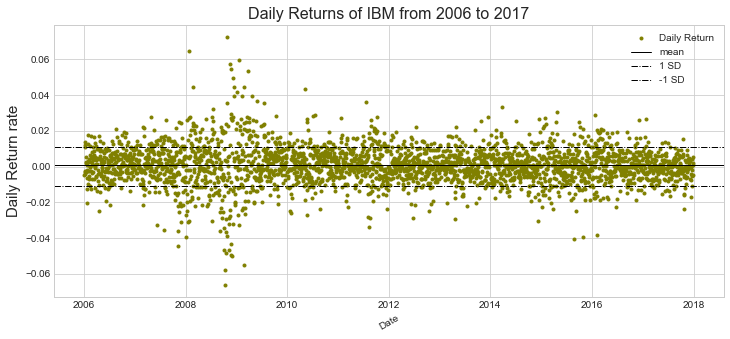

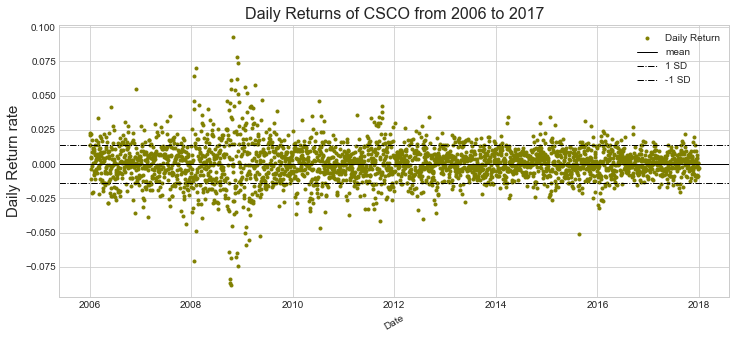

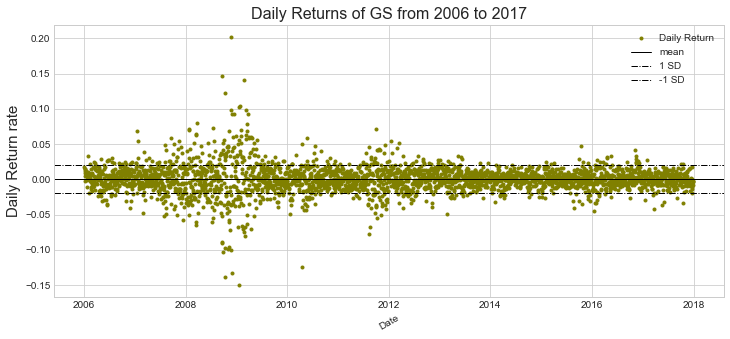

In [26]:
# Daily Return Rate Scatter:
for i in [s3, s4, s5, s6, s7]:
    plt.figure(figsize=(12,5))
    plt.plot(i['Date'],((i['Close']/i['Open'])-1),color='olive', linestyle='',marker='.', label = 'Daily Return')
    plt.xlabel('Date',fontsize=10, rotation = 30)
    plt.axhline(y=((i['Close']/i['Open'])-1).mean(), linewidth=1, color = 'k', label = 'mean')
    plt.axhline(y=((i['Close']/i['Open'])-1).std(), linewidth=1, linestyle='-.', color = 'k', label = '1 SD')
    plt.axhline(y=-((i['Close']/i['Open'])-1).std(), linewidth=1, linestyle='-.', color = 'k', label = '-1 SD')
    plt.ylabel('Daily Return rate',fontsize=15)
    plt.xticks(fontsize=10)
    plt.grid(True)
    plt.legend()
    plt.yticks(fontsize=10)
    plt.title('Daily Returns of {} from 2006 to 2017'.format(i['Name'].iloc[1]),fontsize=16)
    plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

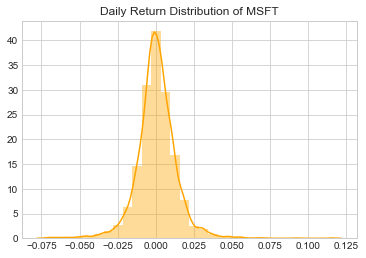

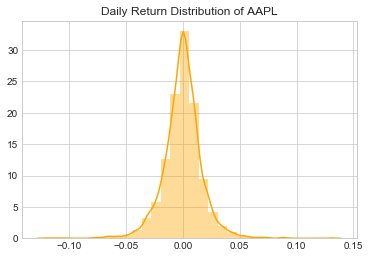

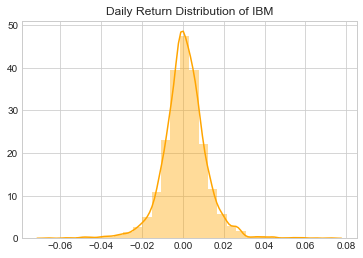

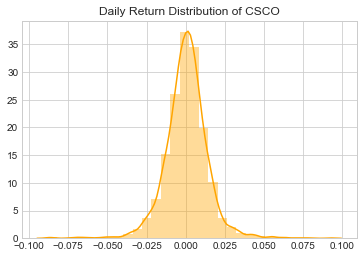

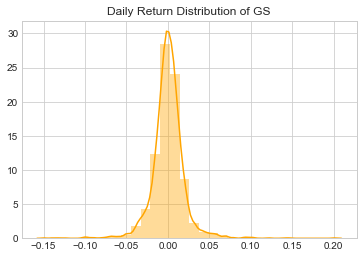

<Figure size 432x288 with 0 Axes>

In [27]:
#Distribution of daily return rate:
for i in [s3, s4, s5, s6, s7]:
    sns.distplot(((i['Close']/i['Open'])-1),bins=30,color='orange').set_title('Daily Return Distribution of {}'.format(i['Name'].iloc[1]))
    plt.figure()